importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

load datasets

In [ ]:
test_data = pd.read_csv('insta_test.csv')
train_data = pd.read_csv('insta_train.csv')

**PROFILE PICTUR**E - The user has profile picture or not.
**NUMS/LENGTH USERNAME** - The ratio of number of numerical chars in username to its length.
**FULLNAME WORDS** - Full name in word tokens
**NAME/LENGTH OF FULL NAME** - The ratio of number of numerical characters in full name to its length.
**NAME == USERNAME** - Are username and full name literally the same?
**DESCRIPTION LENGTH **- Bio length in characters.
**EXTERNAL URL** - Has external URL or not.
**PRIVATE** - Private or not.
**POSTS** - Number of posts.
**FOLLOWERS** - Number of followers.
**FOLLOWS** - Number of follows.

In [ ]:
test_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
train_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


training data analysis

In [ ]:
#data frames information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
#Number of fake and real accounts
train_data['fake'].value_counts()

,count
fake,
0,288
1,288


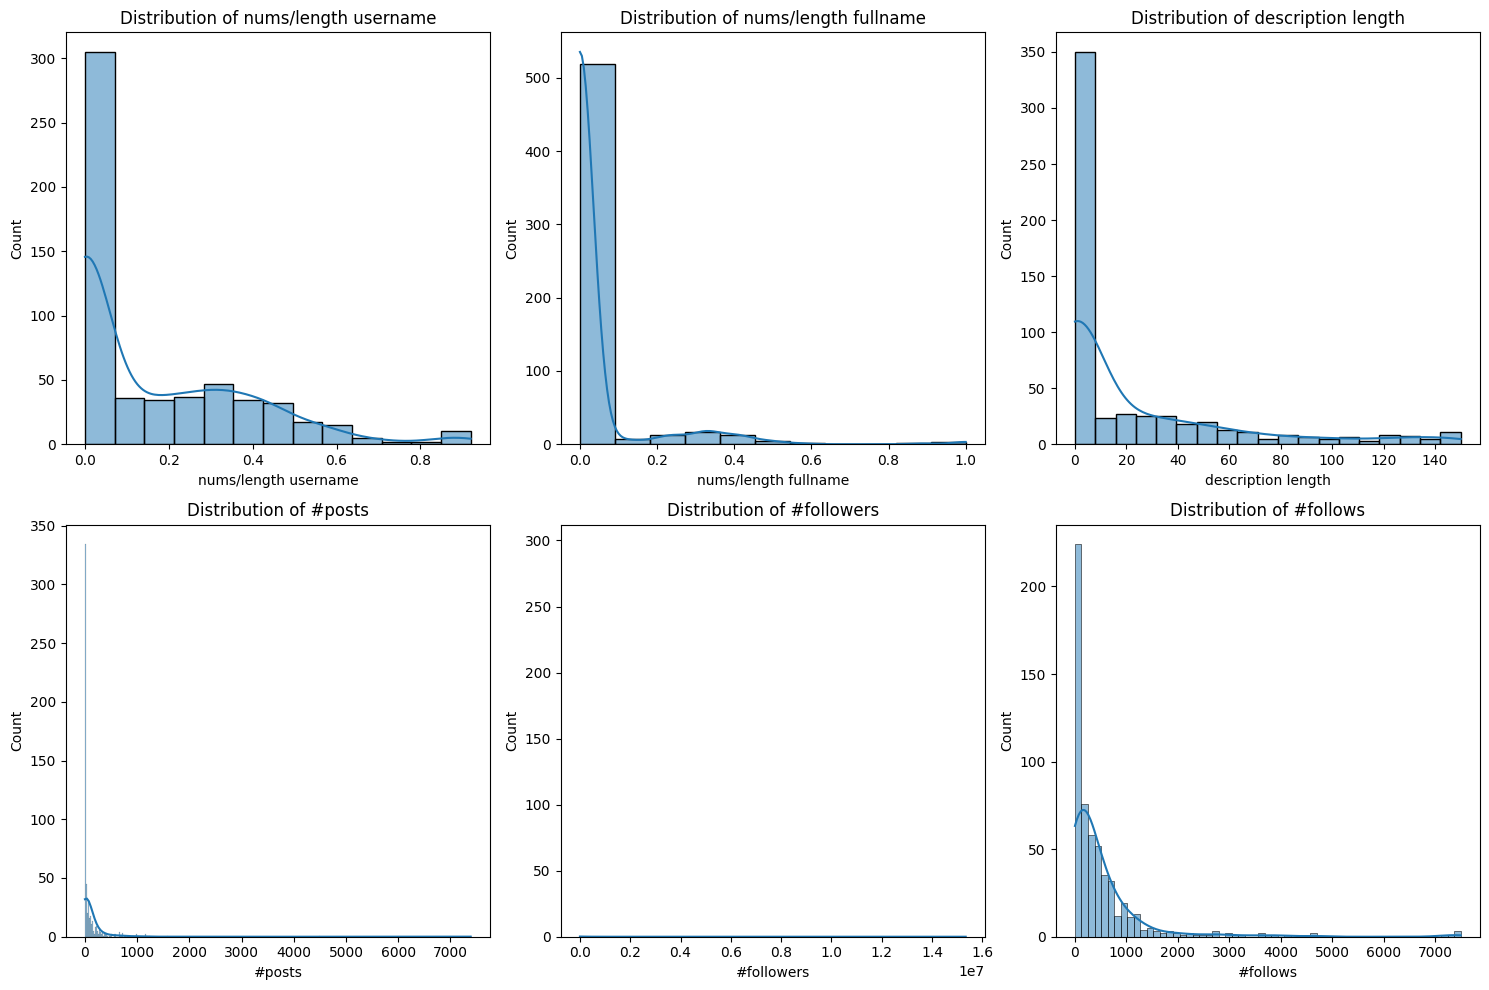

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numeric_columns = ['nums/length username', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']

# Plot each feature's distribution
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

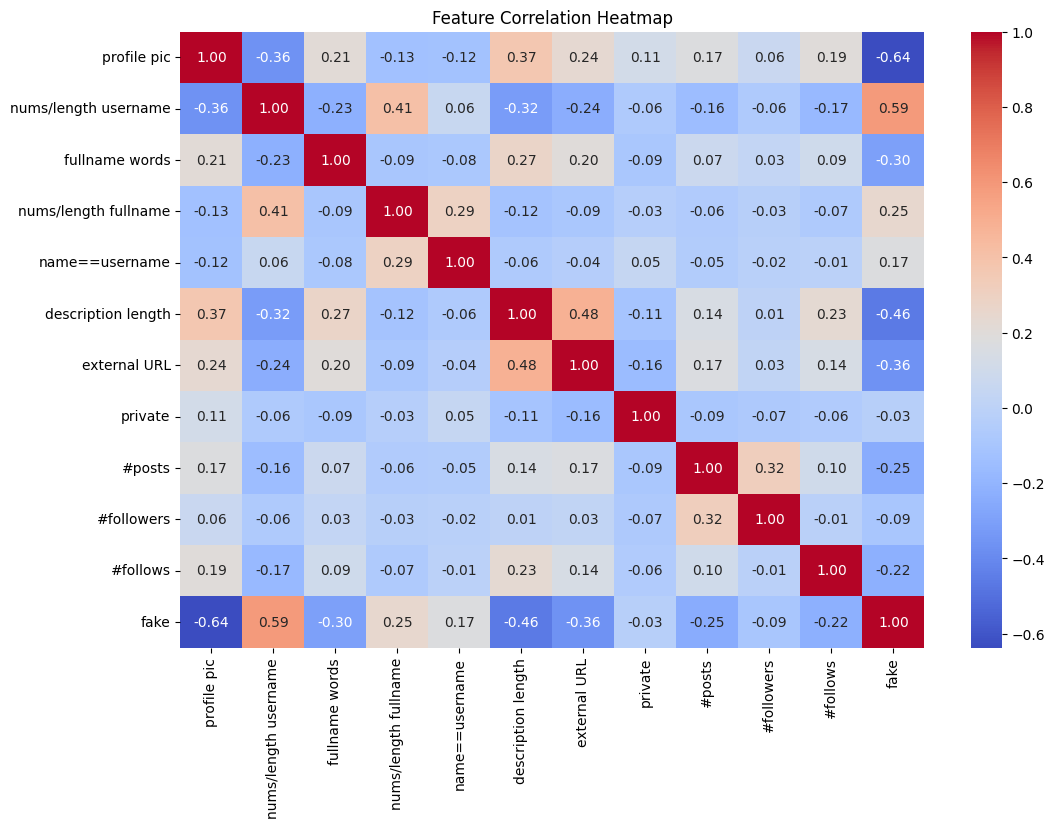

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

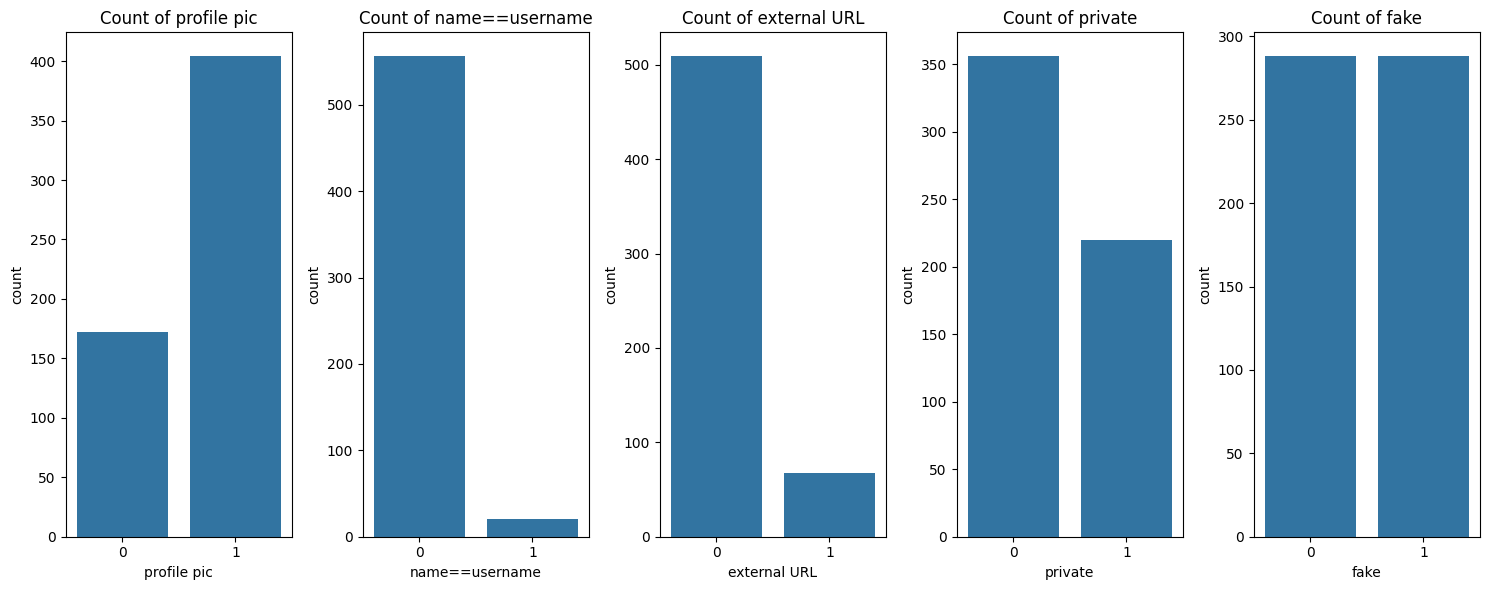

In [ ]:
binary_columns = ['profile pic', 'name==username', 'external URL', 'private', 'fake']

# Plot each binary feature's counts
plt.figure(figsize=(15, 6))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(1, 5, i)
    sns.countplot(x=train_data[column])
    plt.title(f'Count of {column}')

plt.tight_layout()
plt.show()


testing data analysis

In [ ]:
#data frames information
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
#Number of fake and real accounts
test_data['fake'].value_counts()

,count
fake,
0,60
1,60


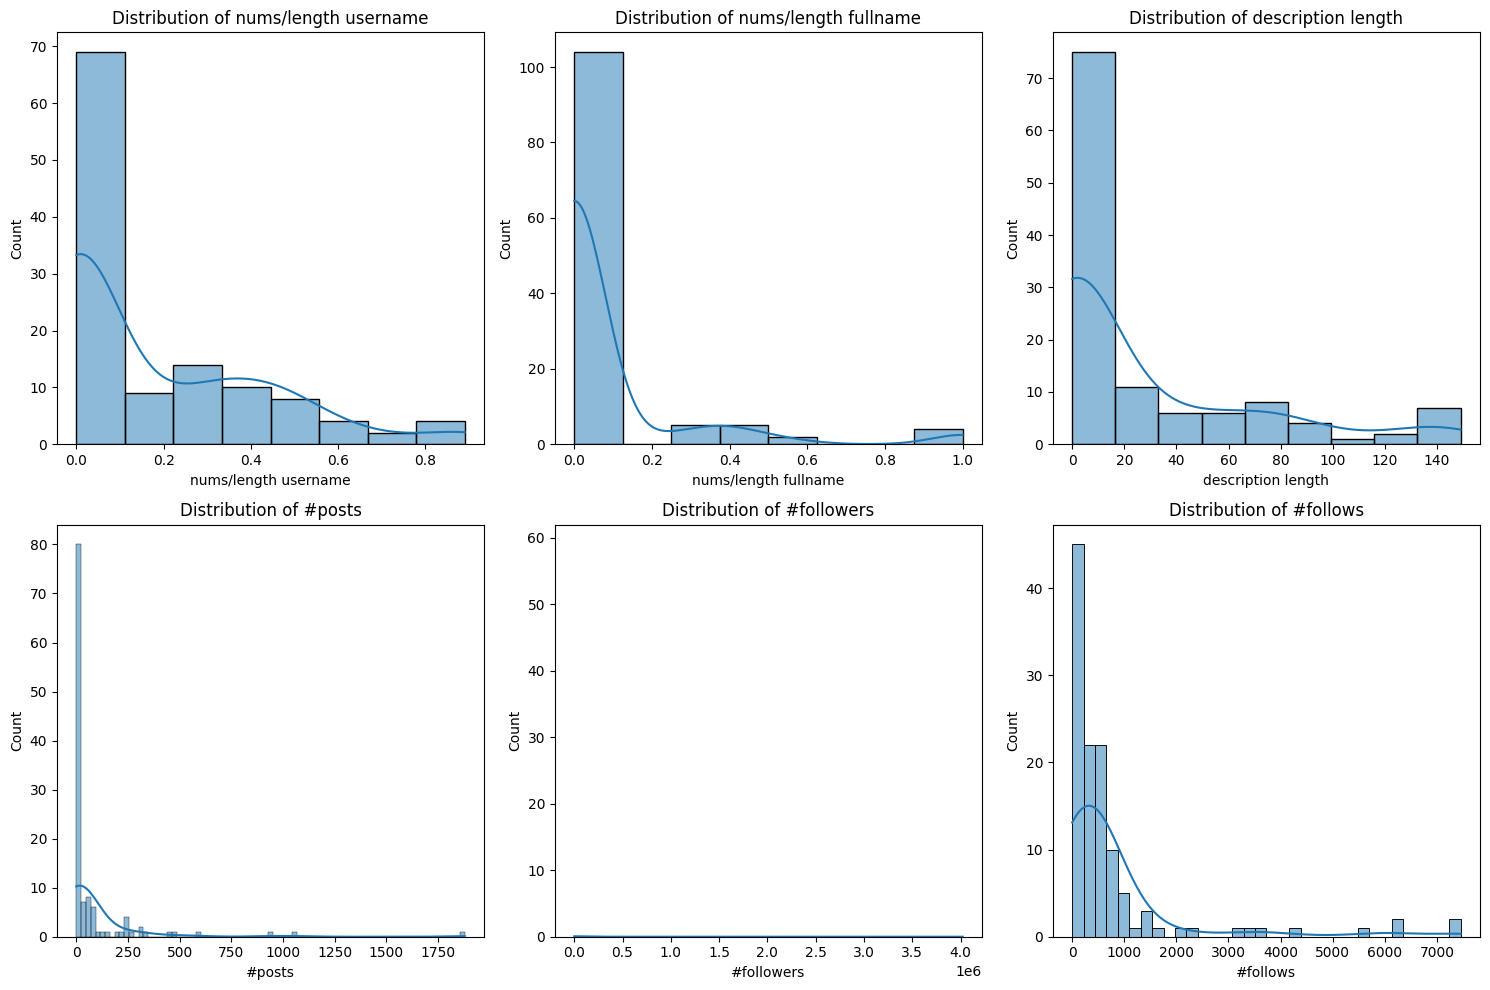

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numeric_columns = ['nums/length username', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']

# Plot each feature's distribution
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(test_data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

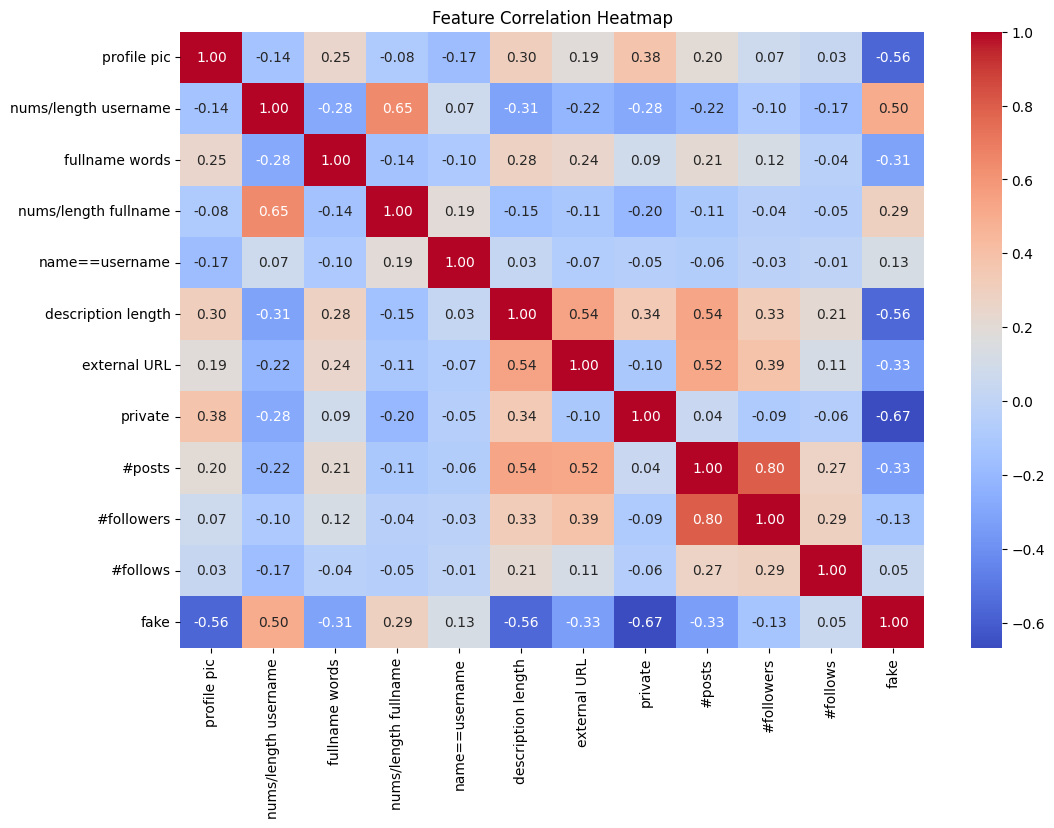

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(test_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

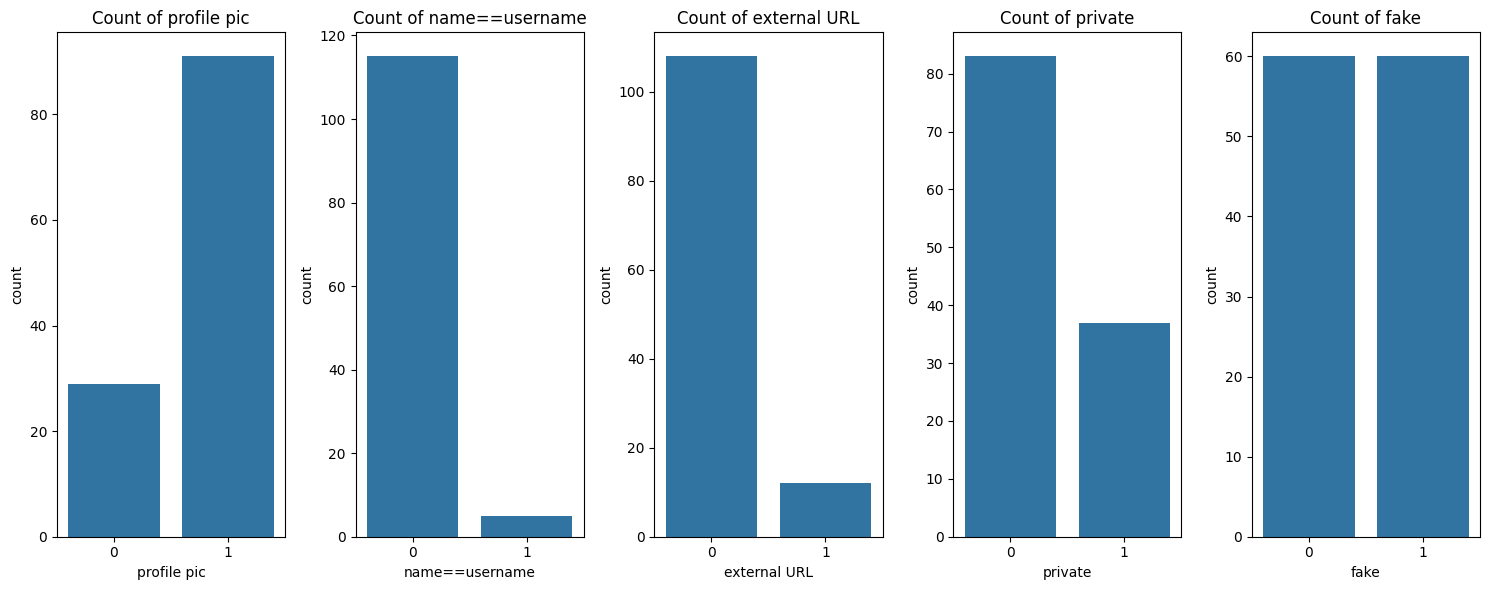

In [ ]:
binary_columns = ['profile pic', 'name==username', 'external URL', 'private', 'fake']

# Plot each binary feature's counts
plt.figure(figsize=(15, 6))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(1, 5, i)
    sns.countplot(x=test_data[column])
    plt.title(f'Count of {column}')

plt.tight_layout()
plt.show()

feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Define features (X) and target (y)
X = test_data.drop(columns=['fake'])  # Exclude the target variable
y = test_data['fake']

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                 Feature  Importance
8                 #posts    0.227354
7                private    0.173174
5     description length    0.158122
9             #followers    0.136060
1   nums/length username    0.091587
10              #follows    0.079315
2         fullname words    0.051361
0            profile pic    0.048936
3   nums/length fullname    0.019025
6           external URL    0.012103
4         name==username    0.002963


adding data into variables

In [ ]:
x_train = train_data.drop(columns = ['fake'])
x_test = test_data.drop(columns = ['fake'])
y_train = train_data['fake']
y_test = test_data['fake']

scaling data

In [ ]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# random forest

In [ ]:
#reandomForestAlgo
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state=18)
model1.fit(x_train, y_train)
predictions = model1.predict(x_test)



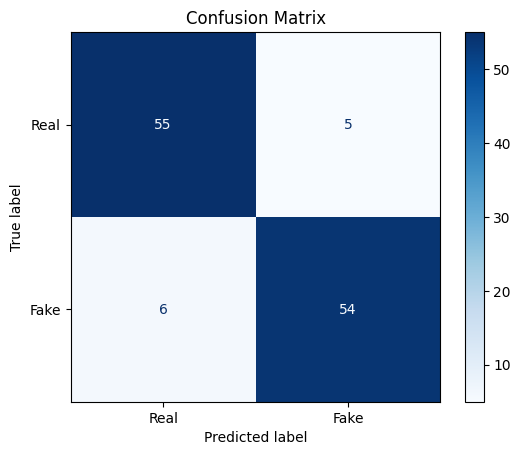

Accuracy: 0.9083333333333333
Precision: 0.9152542372881356
Recall: 0.9
F1-Score: 0.907563025210084
 Accuracy: 0.91%
 AUC: 0.9083


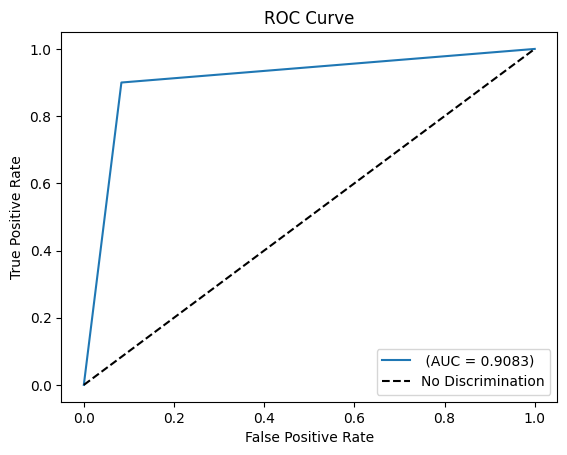

In [ ]:
#randomForestAlgo

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy1 = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

def evaluate_algorithm( X_test, y_test, pred):
    y_pred = pred
    accuracy = np.mean(y_pred == y_test) * 100

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f" Accuracy: {accuracy1:.2f}%")
    print(f" AUC: {roc_auc:.4f}")


    # Optional: Plot ROC curve using matplotlib
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    #return accuracy, roc_auc  # You can return both values if needed
evaluate_algorithm(x_test, y_test, predictions)

Logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


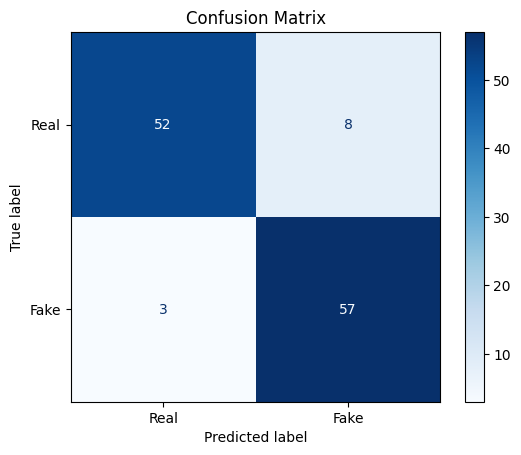

Accuracy: 0.9083333333333333
Precision: 0.8769230769230769
Recall: 0.95
F1-Score: 0.912
 Accuracy: 0.91%
 AUC: 0.9083


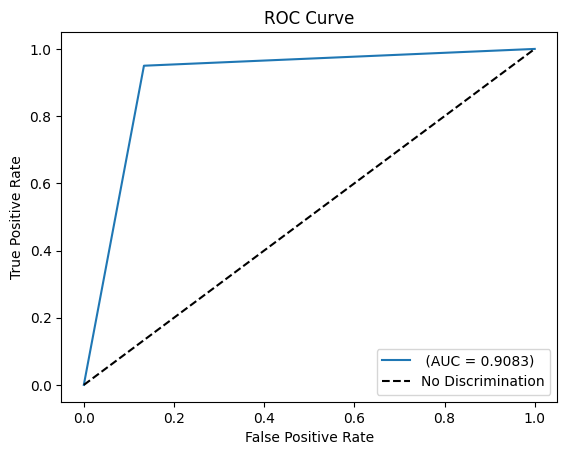

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

model2 = LogisticRegression(random_state=18)
model2.fit(x_train, y_train)
predictions = model2.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy2 = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

def evaluate_algorithm( X_test, y_test, pred):
    y_pred = pred
    accuracy = np.mean(y_pred == y_test) * 100

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f" Accuracy: {accuracy2:.2f}%")
    print(f" AUC: {roc_auc:.4f}")


    # Optional: Plot ROC curve using matplotlib
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    #return accuracy, roc_auc  # You can return both values if needed
evaluate_algorithm(x_test, y_test, predictions)

Decision tree classifier

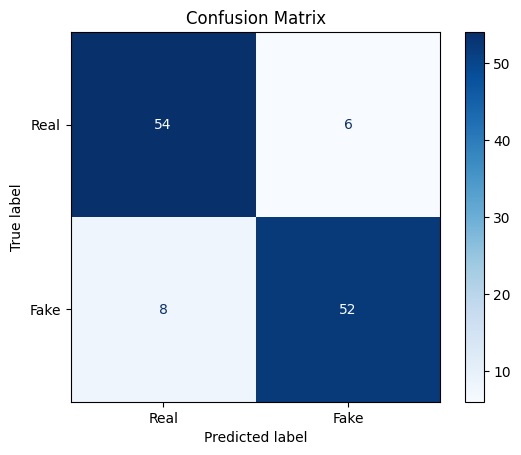

Accuracy: 0.8833333333333333
Precision: 0.896551724137931
Recall: 0.8666666666666667
F1-Score: 0.8813559322033898
 Accuracy: 0.88%
 AUC: 0.8833


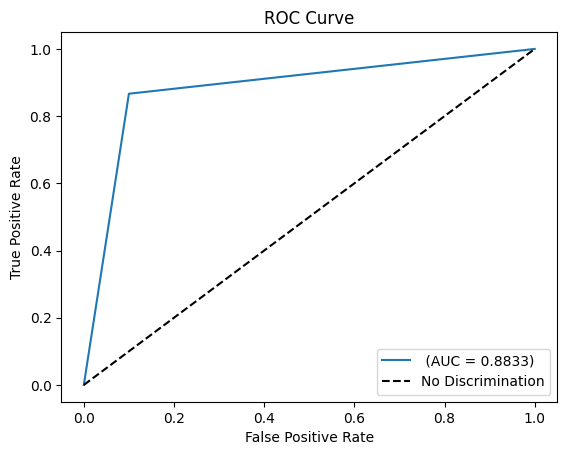

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

model3 = DecisionTreeClassifier(random_state=18)
model3.fit(x_train, y_train)
predictions = model3.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy3 = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy3}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

def evaluate_algorithm( X_test, y_test, pred):
    y_pred = pred
    accuracy = np.mean(y_pred == y_test) * 100

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f" Accuracy: {accuracy3:.2f}%")
    print(f" AUC: {roc_auc:.4f}")


    # Optional: Plot ROC curve using matplotlib
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    #return accuracy, roc_auc  # You can return both values if needed
evaluate_algorithm(x_test, y_test, predictions)

*Support* vector machine classifier


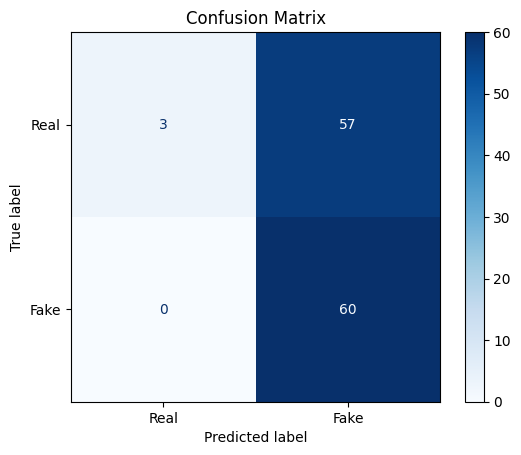

Accuracy: 0.525
Precision: 0.5128205128205128
Recall: 1.0
F1-Score: 0.6779661016949152
 Accuracy: 0.53%
 AUC: 0.5250


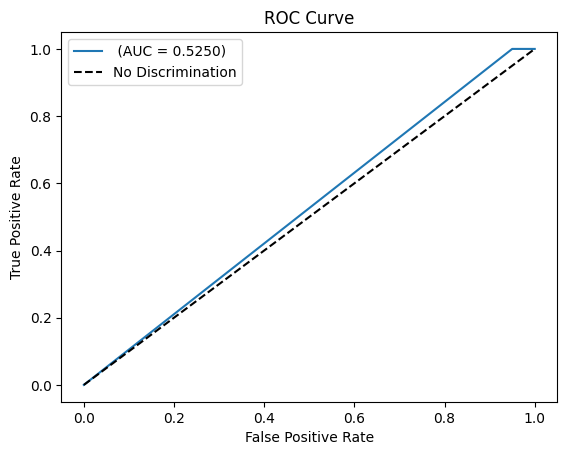

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

model4 = SVC(kernel='rbf', probability=True, random_state=18)
model4.fit(x_train, y_train)
predictions = model4.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy4 = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy4}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

def evaluate_algorithm( X_test, y_test, pred):
    y_pred = pred
    accuracy = np.mean(y_pred == y_test) * 100

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f" Accuracy: {accuracy4:.2f}%")
    print(f" AUC: {roc_auc:.4f}")


    # Optional: Plot ROC curve using matplotlib
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    #return accuracy, roc_auc  # You can return both values if needed
evaluate_algorithm(x_test, y_test, predictions)

Naive Bayes classifier


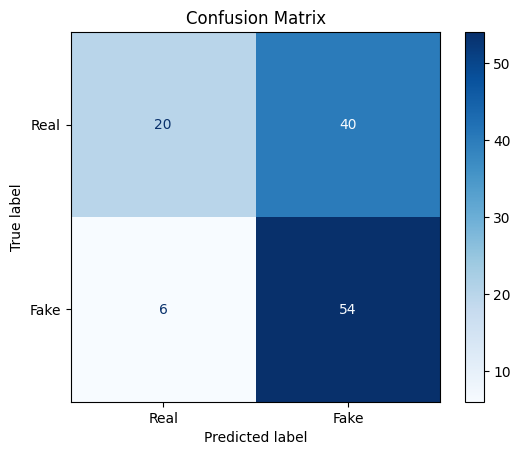

Accuracy: 0.6166666666666667
Precision: 0.574468085106383
Recall: 0.9
F1-Score: 0.7012987012987013
 Accuracy: 0.62%
 AUC: 0.6167


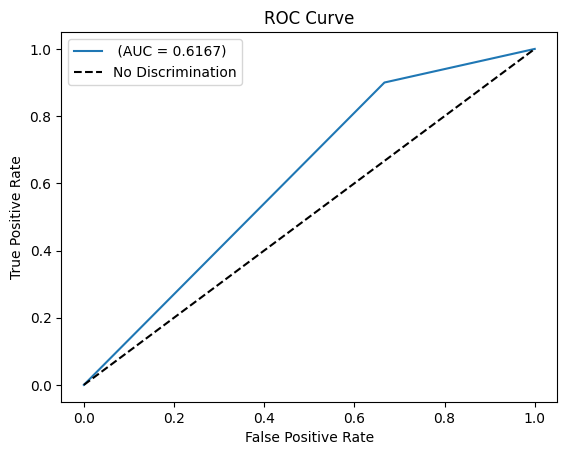

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


model5 = GaussianNB()
model5.fit(x_train, y_train)
predictions = model5.predict(x_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy5 = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy5}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

def evaluate_algorithm( X_test, y_test, pred):
    y_pred = pred
    accuracy = np.mean(y_pred == y_test) * 100

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Print results
    print(f" Accuracy: {accuracy5:.2f}%")
    print(f" AUC: {roc_auc:.4f}")


    # Optional: Plot ROC curve using matplotlib
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    #return accuracy, roc_auc  # You can return both values if needed
evaluate_algorithm(x_test, y_test, predictions)

summary of all algorithm accuracy

In [ ]:
print(f" random forest : {accuracy1}%")
print(f" Logistic regression : {accuracy2}%")
print(f" Decision tree classifier : {accuracy3}%")
print(f" Support vector machine classifier : {accuracy4}%")
print(f" Naive Bayes classifier : {accuracy5}%")

 random forest : 0.9083333333333333%
 Logistic regression : 0.9083333333333333%
 Decision tree classifier : 0.8833333333333333%
 Support vector machine classifier : 0.525%
 Naive Bayes classifier : 0.6166666666666667%


creating pickle file

In [ ]:
import pickle
pickle.dump(model1, open('model.pkl','wb'))

In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load the trained model from the pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Verify the type of model loaded
print(type(model))  # This will tell you what type of model it is (e.g., LogisticRegression)

# Check how many features the model was trained on
print(f"Model expects {model.n_features_in_} features.")

# Check if the model stores feature names
if hasattr(model, 'feature_names_in_'):
    print("Feature Names: ", model.feature_names_in_)

# Create a sample input with the correct number of features (e.g., 11 features)
input_data = np.array([[1,	0.55,	1	,0.44,	0,	0	,0,	0	,33	,166	,596]])  # Example input

# Convert the input data into a pandas DataFrame with the correct feature names
feature_names = model.feature_names_in_  # Getting the feature names from the model
input_df = pd.DataFrame(input_data, columns=feature_names)

# Make prediction
prediction = model.predict(input_df)
print("Prediction:", prediction)
print(type(prediction))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Model expects 11 features.
Feature Names:  ['profile pic' 'nums/length username' 'fullname words'
 'nums/length fullname' 'name==username' 'description length'
 'external URL' 'private' '#posts' '#followers' '#follows']
Prediction: [1]
<class 'numpy.ndarray'>
